# Cleaning US Census Data

The data is in multiple `csv` files.

## Inspecting the Data!

Using `glob`, we will loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

states_files = glob.glob('states*.csv')
states_list = []
for file in states_files:
    states = pd.read_csv(file)
    states_list.append(states)

states_df = pd.concat(states_list).reset_index()

We will look at the `.columns` and the `.dtypes` of the `states_df` DataFrame.

In [2]:
print(states_df.columns)
print(states_df.dtypes)

Index(['index', 'Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White',
       'Black', 'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
index          int64
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


We will look at the `head()` of the DataFrame.

In [3]:
states_df.head()

,index,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


We need to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [4]:
# we first select the column and transform into a format ready for conversion
Income_split = states_df.Income.str[1:].str.replace(',', '')
# we then convert it to a numeric dtype and assign it to our column
states_df.Income = pd.to_numeric(Income_split)
states_df.Income.head()

0    43296.36
1    70354.74
2    54207.82
3    41935.63
4    67264.78
Name: Income, dtype: float64

We shoudld Split the `GenderPop` column into those two new columns using `str.split` and separating out those results.

In [5]:
genderpop_split = states_df.GenderPop.str.split('_')
states_df['MalePop'] = genderpop_split.str.get(0)
states_df['FemalePop'] = genderpop_split.str.get(1)

We convert both of the columns into numerical datatypes.

There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [6]:
states_df.MalePop = pd.to_numeric(states_df.MalePop.str[:-1])
states_df.FemalePop = pd.to_numeric(states_df.FemalePop.str[:-1])

states_df[['MalePop', 'FemalePop']].head()

,MalePop,FemalePop
0,2341093,2489527.0
1,384160,349215.0
2,3299088,3342840.0
3,1451913,1506295.0
4,19087135,19334329.0


Now we should have the columns we need to make the graph.

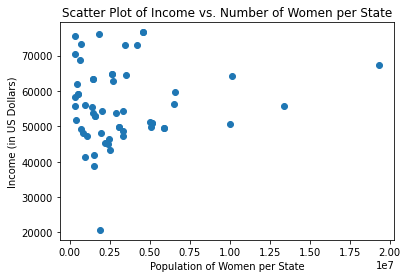

In [7]:
plt.scatter(states_df.FemalePop, states_df.Income)
plt.title("Scatter Plot of Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (in US Dollars)")
plt.show()

We need to double check our work. These csv files probably have `nan` values in them!

In [8]:
states_df.FemalePop = states_df.FemalePop.fillna(states_df.TotalPop - states_df.MalePop)
states_df[['FemalePop']]

,FemalePop
0,2489527.0
1,349215.0
2,3342840.0
3,1506295.0
4,19334329.0
5,2630239.0
6,2630239.0
7,1841615.0
8,478041.0
9,340810.0


We also need to check for duplicates!

In [9]:
print(states_df.duplicated())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
dtype: bool


In [10]:
states_df = states_df.drop_duplicates()

We will make the scatterplot again. Now, it should be perfect!.

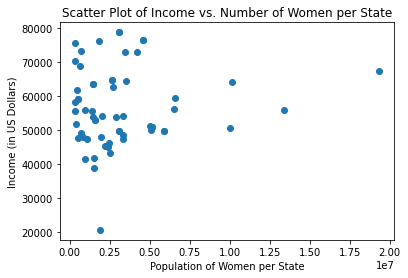

In [11]:
plt.scatter(states_df.FemalePop, states_df.Income)
plt.title("Scatter Plot of Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (in US Dollars)")
plt.show()

## Histogram of Races

We will try to make a histogram for each one!

we will have to get the columns into the numerical format, and those percentage signs will have to go.

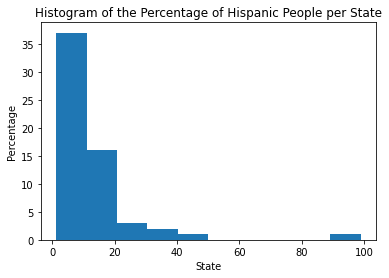

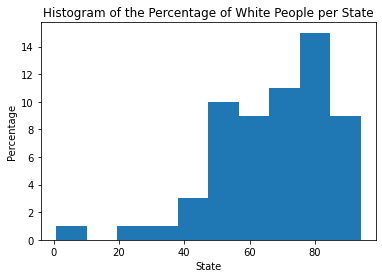

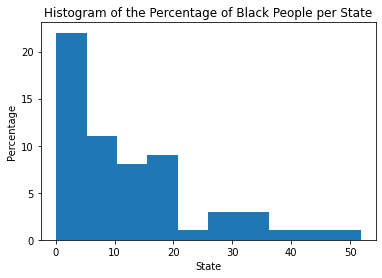

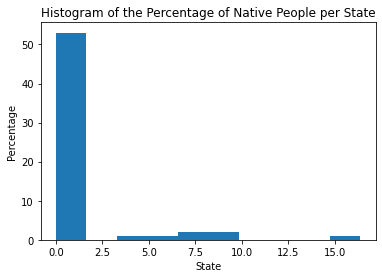

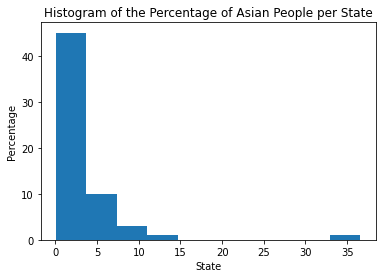

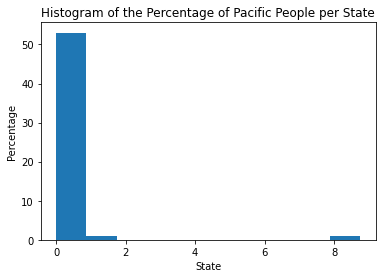

In [12]:
# tnrasforming the race columns into a numerical format
races = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

for race in races:
    states_df[race] = pd.to_numeric(states_df[race].str[:-1])

for race in races:
    plt.hist(states_df[race])
    plt.title("Histogram of the Percentage of {} People per State".format(race))
    plt.xlabel("State")
    plt.ylabel("Percentage")
    plt.show()